# Retrain your HuggingFace Model
Once we have these extra human labelled results, we need to retrain our model utilising the new annotations and then (re)deploy the model



In [ ]:
import boto3
import sagemaker
import botocore
sm_client = boto3.client("sagemaker")

In [ ]:
pipeline_name = f"SentimentModelRetrain"


In [ ]:
try:
    sm_client.describe_pipeline(PipelineName=pipeline_name)
    response = sm_client.start_pipeline_execution(
        PipelineName=pipeline_name,
        PipelineExecutionDisplayName='Manual-Retrain-Execution',
        PipelineExecutionDescription='Execution triggered manually by user on notebook 4 to simulate retraining and fine tuning of model given the new human reviews',
    )

except botocore.exceptions.ClientError as error:
    print(error)
    print("----------")
    print("You have either not created the pipeline or have changed the default name. Please return to notebook '1' and check if the pipeline was successfully created or you used a different pipeline name")

In [ ]:
sm_client.describe_pipeline_execution(
        PipelineExecutionArn=response["PipelineExecutionArn"]
    )

## Alternatively use the SageMaker Studio UI

Navigate to the pipeline page, and click on create execution.
<br>
![4-retrain.png](images/4-retrain.png)
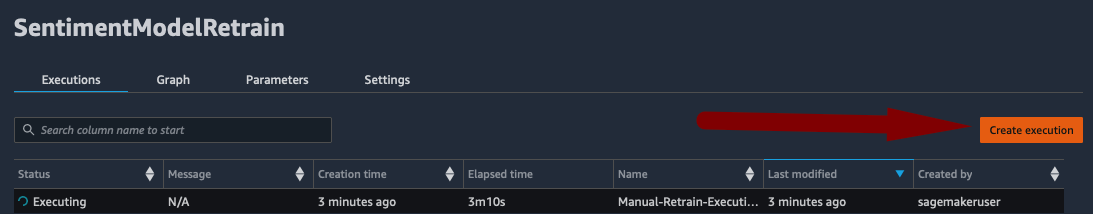

### You can now navigate to the pipeline execution page and see a new run of the pipeline being started

You can now wait for it to finish, then approve the latest model, and finally update the live model. 
<br> 
Once the above is done, all you need to do is run again the notebook 
`2B_model_deploy.ipynb` which will update your live endpont with the latest improved model, and then optionally run notebooks `3` and `4` as you see fit 


## Congatulations, you reached the end of this workshop!